### General Assembly Data Science Immersive Capstone Project
># Fake News Detection
>#### by Rohazeanti

# Problem Statement
Many fake news and data are disseminated online, particularly on social feeds and conversation groups. Fake news is information, stories or hoaxes made to misinform or mislead audiences. These types of narratives are made to influence people’s views, push the political agenda, create embarrassment, and get gains out of online publishers. The proliferation of news on social media and the Internet is deceiving people to an extent which needs to be stopped. 

**<br>This project aims to deploy a highly accurate model that classifies a given news article as either fake or true, allowing consumers to check for news reliability through their browsers efficiently.**


## Contents
- [Import Libraries](#Import-Libraries)
- [Read Data](#Read-Data)
- [Inspect Data](#Inspect-Data)
- [Data Cleaning](#Data-Cleaning)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Libraries and packages for text (pre-)processing 
import string
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import pickle

pd.options.display.max_columns = None

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Read Data

In [2]:
true_df = pd.read_csv("News _dataset/True.csv")
fake_df = pd.read_csv("News _dataset/Fake.csv")

### Inspect Data

In [3]:
#store dataframes in list
dfs = [
    (true_df, 'true_df'),
    (fake_df, 'fake_df')
    ]

In [4]:
def inspect_data(df, df_name):
    print("-----",df_name.upper(), "-----\n")
    print(f"Rows: {df.shape[0]} \t Columns: {df.shape[1]}\n")
    
    print(f"Total null rows: {df.isnull().sum().sum()}")
    print(f"Percentage of null rows: {round(df.isnull().sum().sum() / df.shape[0] * 100, 2)}% \n")
    
    print(f"Total duplicate rows: {df[df.duplicated(keep=False)].shape[0]}")
    print(f"Percentage of duplicated rows: {round(df[df.duplicated(keep=False)].shape[0] / df.shape[0] * 100, 2)}% \n")
    
    print(df.info())
    print("\n")
    
def check_null(df):
    df.isnull().sum()
    
# Create 4 new columns: Year, Month, Day, Week from the Date column
def create_yr_day_mth(df): 
    df['year'] = [dd.year for dd in pd.DatetimeIndex(df.date.values)]
    df['month'] = [dd.month for dd in pd.DatetimeIndex(df.date.values)]
    df['day'] = [dd.day for dd in pd.DatetimeIndex(df.date.values)]
    df['week'] = [dd.week for dd in pd.DatetimeIndex(df.date.values)]
    return df.head()

# Convert the Date into datetime format
def convert_date(df): 
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by='date',ascending=True,inplace=True)
    df.reset_index(drop=True,inplace=True)
    return df.date.dtypes

#find min and max date
def min_max_date(df, df_name):
    print("-----",df_name.upper(), "-----\n")
    print("Earliest record: ", df.Date.min(),
      "\nLatest Record: ", df.Date.max(), "\n")
    print(df['Year'].unique(),"\n")
    
#trim white spaces
def white_space_remover(df):
    for i in df.columns:
        if df[i].dtype == 'object':
             
        # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
             
        # if condn. is False then it will do nothing.
            pass
    

In [5]:
true_df.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [6]:
fake_df.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [7]:
[inspect_data(df, name) for df, name in dfs]

----- TRUE_DF -----

Rows: 21417 	 Columns: 4

Total null rows: 0
Percentage of null rows: 0.0% 

Total duplicate rows: 399
Percentage of duplicated rows: 1.86% 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


----- FAKE_DF -----

Rows: 23481 	 Columns: 4

Total null rows: 0
Percentage of null rows: 0.0% 

Total duplicate rows: 6
Percentage of duplicated rows: 0.03% 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3  

[None, None]

**true_df**
- There are 21417 rows and 4 columns
- There are no null values but I will confirm further by removing blank spaces(if any)
- There are 399 duplicate rows. I will check each duplicate rows and drop them
- All the columns except `date` have correct data type. 

**fake_df**
- There are 23481 rows and 4 columns
- There are no null values but I will confirm further by removing blank spaces(if any)
- There are 6 duplicate rows which I will check and drop
- Just like true_df, only `date` is not in correct data type

*Moving forward...*

- I will be taking create a class feature named 'target' for each dataset assign **1** to fake_df and **0** to true_df. Thereafter I will append the two datasets and continue with data cleaning. 



**Create target column for each dataset**

In [8]:
#new target column for true_df and assign value 0
true_df['target'] = 0

#check counts, should return 21417
true_df['target'].value_counts()

0    21417
Name: target, dtype: int64

In [9]:
#new target column for fake_df and assign value 1
fake_df['target'] = 1

#check counts, should return 23481
fake_df['target'].value_counts()

1    23481
Name: target, dtype: int64

**Merge true_df and fake_df**

In [10]:
# Combining both exercise and diet datasets into a single combined dataset, named df
df = true_df[["title", "text", "subject", "date", "target"]].append(fake_df[["title", "text", "subject", "date", "target"]])

In [11]:
# Resetting index
df = df.reset_index(drop=True)

In [12]:
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [13]:
#check shape, should return 44,898 rows, 5 columns
df.shape

(44898, 5)

In [14]:
#check target value counts
df.target.value_counts()

1    23481
0    21417
Name: target, dtype: int64

In [15]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


### Data Cleaning
- For data cleaning, I have done the following:
1. [Trim to remove white spaces](#1.-Trim-to-remove-white-spaces)
2. [Inspect null values](#2.-Inspect-null-values)
3. [Combine title and text](#3.-Combine-title-and-text)
4. [Change date data type](#4.-Change-date-data-type)
5. [Find overlapping authors](#5.-Find-overlapping-authors)
6. [Inspect duplicates](#6.-Inspect-duplicates)
7. [Drop duplicate rows](#7.-Drop-duplicate-rows)
8. [Preprocess data](#8.-Preprocess-data)

#### 1. Trim to remove white spaces

In [16]:
white_space_remover(df)

In [17]:
df = df.replace(r'^\s*$', np.nan, regex=True)

#### 2. Check null values

In [18]:
df.isnull().sum()

title        0
text       631
subject      0
date         0
target       0
dtype: int64

In [19]:
#print the rows with missing texts
df[df['text'].isnull()]

,title,text,subject,date,target
8970,Graphic: Supreme Court roundup,NaN,politicsNews,"June 16, 2016",0
32340,TAKE OUR POLL: Who Do You Think President Trum...,NaN,politics,"May 10, 2017",1
32458,Joe Scarborough BERATES Mika Brzezinski Over “...,NaN,politics,"Apr 26, 2017",1
32607,WATCH TUCKER CARLSON Scorch Sanctuary City May...,NaN,politics,"Apr 6, 2017",1
32642,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,NaN,politics,"Apr 2, 2017",1
...,...,...,...,...,...
43233,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,NaN,left-news,"Apr 27, 2015",1
43243,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,NaN,left-news,"Apr 25, 2015",1
43244,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,NaN,left-news,"Apr 25, 2015",1
43274,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,NaN,left-news,"Apr 14, 2015",1


In [20]:
# percentage of null value
(df['text'].isnull().sum()/len(df['text']))*100

1.4054078132656243

In [21]:
# percentage of null values groupby target
(df['text'].isnull().groupby(df['target']).sum()/df.target.value_counts())*100

0    0.004669
1    2.683020
dtype: float64

**Comments:**
- There are 631 of rows(1.4% of dataset) with missing text while the corresponding title is available. 
- 2.6% of fake dataset have missing texts

#### 3. Combine title and text
- As there are missing text but the title is intact and might contain useful information, I will combine title and text, and named the column title_text.

In [22]:
#replace missing row with blank
df = df.replace(np.nan, "")

In [23]:
df['title_text'] = df['title'] + " " + df['text']

In [24]:
df['title_text'].isnull().sum()

0

In [25]:
df.head()

,title,text,subject,date,target,title_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,Trump wants Postal Service to charge 'much mor...


#### 4. Change date data type
- I ran into 'unknown string format' error when I try to convert the date. My next step is to determine which rows have undesirable string format, and remove it. 

In [26]:
df.date.value_counts()

December 20, 2017                                                                                                                                        185
November 30, 2017                                                                                                                                        169
December 6, 2017                                                                                                                                         169
November 9, 2017                                                                                                                                         162
September 21, 2017                                                                                                                                       161
                                                                                                                                                        ... 
https://100percentfedup.com/served-roy-moore-vietnamletter

- There are instances where the date value does not contain date information but website URL.

In [27]:
#find string that contains website URL
date_index = df[df['date'].str.contains('https')].index.values.tolist()

df[df.index.isin(date_index)]

,title,text,subject,date,target,title_text
30775,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,1,https://100percentfedup.com/served-roy-moore-v...
36924,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,1,https://100percentfedup.com/video-hillary-aske...
36925,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,1,https://100percentfedup.com/12-yr-old-black-co...
37256,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1,https://fedup.wpengine.com/wp-content/uploads/...
37257,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1,https://fedup.wpengine.com/wp-content/uploads/...
38849,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,1,https://fedup.wpengine.com/wp-content/uploads/...
38850,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,1,https://fedup.wpengine.com/wp-content/uploads/...
43286,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,1,https://fedup.wpengine.com/wp-content/uploads/...
43287,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,1,https://fedup.wpengine.com/wp-content/uploads/...


- The `text` element does not contain anything meaningful as well. As such, I will drop these rows

In [28]:
#check shape before dropping
df.shape

(44898, 6)

In [29]:
# drop rows
for i in date_index:
    df.drop([i], axis='index',inplace =True)

In [30]:
#check shape after dropping
df.shape

(44889, 6)

I tried converting the date column but ran into error again. 

In [31]:
df.date.unique()

array(['December 31, 2017', 'December 29, 2017', 'December 30, 2017', ...,
       'May 2, 2015',
       'MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps…He Couldn’t Be More Wrong [Video]',
       'Jul 18, 2015'], dtype=object)

There is a row that does not contain date information. As such I will drop the row

In [32]:
#find string that contains 'MSNBC'
date_index = df[df['date'].str.contains('MSNBC')].index.values.tolist()

df[df.index.isin(date_index)]

,title,text,subject,date,target,title_text
40350,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,1,Homepage [vc_row][vc_column width= 1/1 ][td_bl...


- Similarly, the `text` column does not contain any meaningful information. As such, I will drop this row.

In [33]:
# drop row
for i in date_index:
    df.drop([i], axis='index',inplace =True)

In [34]:
df.shape

(44888, 6)

In [35]:
# convert date 
convert_date(df)

dtype('<M8[ns]')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44888 entries, 0 to 44887
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       44888 non-null  object        
 1   text        44888 non-null  object        
 2   subject     44888 non-null  object        
 3   date        44888 non-null  datetime64[ns]
 4   target      44888 non-null  int64         
 5   title_text  44888 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.1+ MB


- The date column has been converted to an appropriate data type and I am left with 44888 rows. 

#### 5. Find overlapping authors
- In this part, I want to find out if there are authors that post both fake and genuine articles

In [37]:
genuine_authors = set(list(df[df['target']==0]['subject'].unique()))
fake_authors = set(list(df[df['target']==1]['subject'].unique()))
overlapped_authors = genuine_authors.intersection(fake_authors)
print("Number of distinct authors with genuine articles: ", len(genuine_authors))
print("Number of distinct authors with fake articles: ", len(fake_authors))
print("Number of distinct authors with both genuine and fake: ", len(overlapped_authors))

Number of distinct authors with genuine articles:  2
Number of distinct authors with fake articles:  6
Number of distinct authors with both genuine and fake:  0


**Comments:**
<br>There are no authors with both and fake news.

#### 6. Inspect duplicates
- Earlier we saw 399 duplicate rows in true news dataset and 6 duplicate rows in fake news dataset.
- I will inspect the rows with duplicates and take appropriate actions.

In [38]:
#check if `title` and `text` contain same element
df['title'].equals(df['text'])

False

In [39]:
#find duplicated rows, boolean series
duplicated_text = df["title_text"].duplicated(keep=False)

In [40]:
#saving the index of identified duplicated rows
text_index = df["title_text"][duplicated_text].sort_values().index

In [41]:
#print first 10 rows of duplicated rows
df.loc[text_index]

,title,text,subject,date,target,title_text
7071,#AnyoneButHillary: NEW POLL Shows Bernie Suppo...,Hillary may find out she needs more than black...,left-news,2016-04-06,1,#AnyoneButHillary: NEW POLL Shows Bernie Suppo...
7084,#AnyoneButHillary: NEW POLL Shows Bernie Suppo...,Hillary may find out she needs more than black...,politics,2016-04-06,1,#AnyoneButHillary: NEW POLL Shows Bernie Suppo...
33493,#Austin: Fights Break Out Between Police and S...,Commies carrying flags fought with the Austin ...,left-news,2017-09-23,1,#Austin: Fights Break Out Between Police and S...
33559,#Austin: Fights Break Out Between Police and S...,Commies carrying flags fought with the Austin ...,politics,2017-09-23,1,#Austin: Fights Break Out Between Police and S...
20886,#Berkeley CRAZY! RIOTERS CHASE And Beat People...,Is anyone else thinking what we re thinking ab...,politics,2017-02-02,1,#Berkeley CRAZY! RIOTERS CHASE And Beat People...
...,...,...,...,...,...,...
21449,“Would You Rather Do A Job You Hate And Not Pa...,"Filmmaker and patriot, Dennis Michael Lynch is...",left-news,2017-02-12,1,“Would You Rather Do A Job You Hate And Not Pa...
6349,“YOU’RE HIRED!” Trump Pulls Unemployed Vet Fro...,"No matter which candidate you support, this mo...",politics,2016-03-21,1,“YOU’RE HIRED!” Trump Pulls Unemployed Vet Fro...
6344,“YOU’RE HIRED!” Trump Pulls Unemployed Vet Fro...,"No matter which candidate you support, this mo...",Government News,2016-03-21,1,“YOU’RE HIRED!” Trump Pulls Unemployed Vet Fro...
1664,“You’re Not Welcome!” Obama As Welcome At Rose...,Roseberg residents and families of victims are...,politics,2015-10-07,1,“You’re Not Welcome!” Obama As Welcome At Rose...


In [42]:
#distribution of duplicate rows by target
temp = df.loc[text_index]
temp.target.value_counts(normalize=True)

1    0.96133
0    0.03867
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

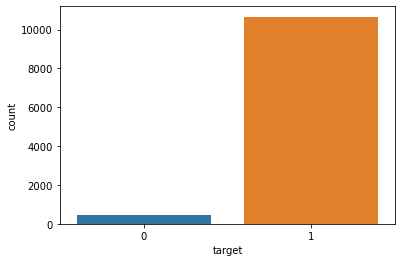

In [43]:
sns.countplot(data = temp, x='target')

- Most of the duplicated `text` rows are from fake news dataset

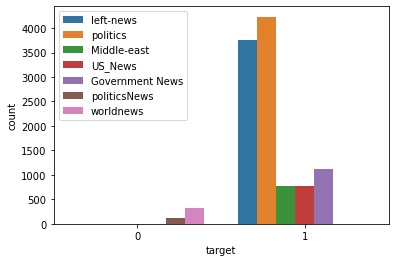

In [44]:
#count of duplicate rows by subject
sns.countplot(data = temp, x='target', hue = 'subject')
plt.legend(loc='upper left')

- politics and left-news are major contributors of duplicate rows.

**Comments:**
- Politics and left-news are major contributors of duplicate rows.
- There are empty rows in text column which are identified as duplicates. These rows were not accounted as null when I checked earlier after removing whitespaces.
- Next, I want to find out how many of such rows exist in our dataset.In order to do that, I will replace the blank values with np.nan. 
- I also note that there are duplicated text by different authors. I believe these subjects are somewhat associated or come from the same narratives. It will be a problem if the same text are both fake and true targets. 

#### 7. Drop duplicate rows

In [45]:
#check duplicates
print("Number of duplicated rows: ",df.title_text.duplicated().sum(),
      "\nNumber of rows in dataset: ",len(df))

Number of duplicated rows:  5791 
Number of rows in dataset:  44888


In [46]:
#drop duplicate, keep last row
df.drop_duplicates(subset=['title_text'], keep = 'last', inplace=True )

In [47]:
#check duplicates and total number of rows
print("Number of duplicated rows: ",df.title_text.duplicated().sum(),
      "\nNumber of rows in dataset: ",len(df))

Number of duplicated rows:  0 
Number of rows in dataset:  39097


In [48]:
df.reset_index(drop= True,inplace=True)

In [49]:
df

,title,text,subject,date,target,title_text
0,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,2015-03-31,1,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...
1,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,left-news,2015-03-31,1,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...
2,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",left-news,2015-03-31,1,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...
3,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,2015-03-31,1,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENN...
4,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,2015-03-31,1,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...
...,...,...,...,...,...,...
39092,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,politics,2018-02-18,1,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...
39093,IT BEGINS…RINO MEGA-DONOR Threatens Jeb Bush: ...,A longtime Republican Party donor based in Flo...,politics,2018-02-18,1,IT BEGINS…RINO MEGA-DONOR Threatens Jeb Bush: ...
39094,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,politics,2018-02-19,1,WATCH: SNOWFLAKES ASKED Communist Party Platfo...
39095,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,politics,2018-02-19,1,MSNBC ANCHOR Flabbergasted at What Texas Teach...


#### 8. Preprocess data
<br> In this section, I will preprocess the `text` to prepare the data for EDA and modelling. The following will be done through a function:
- Remove URL
- Remove HTML tags
- Remove non-ASCII characters
- Remove non-letters
- Lower caps
- Tokenize 
- Lemmetize

In [50]:
df_copy = df

In [51]:
with open('./pickled_df/df.pkl', 'wb') as f:
    pickle.dump(df, f)

In [52]:
#check element before preprocess 
df['title_text'][100]

'(VIDEO) INNOCENT UNTIL PROVEN GUILTY? AIR FORCE VET LOSES $60,000 OVER CIVIL FORFEITURE WITHOUT BEING CHARGED WITH A CRIME Whatever happened to innocent until proven guilty? The government bullies are playing judge, jury and executioner when they take assets in civil forfeiture. Policing for profit Mark Brewer is a decorated Air Force veteran who fought in the global war on terror. But last month, he became a casualty in the drug war.In late March, the U.S. 8th Circuit Court of Appeals ruled that the federal government could take more than $60,000 of Brewer s cash with civil forfeiture, even though he was never charged with a crime. The decision lets many Midwestern states continue to take property from people who have done nothing wrong.A former military police officer and weapons specialist, Brewer earned several medals during his service in the Air Force, before he was medically discharged in 2008. Brewer said he developed Posttraumatic Stress Disorder after a deployment in Afghani

Observations:
- CAPS
- brackets
- $ sign
- punctuations 

In [53]:
#check element before preprocess
df['title_text'][12345]

'Fox Host Gives Trump The Most PATHETICALLY Desperate Advice For Winning Second Debate (VIDEO) Donald Trump s first debate against his Democratic rival Hillary Clinton went just as poorly as we thought it would   and conservatives know it. It s never been more clear that Trump doesn t even deserve to be on the same stage as Clinton, and all the holes in his campaign are being exposed effortlessly. Between the fact-checking and not having any real policies or plans in place, Trump is f*cked big time. Luckily, Fox News is coming to the rescue with some (truly awful, somewhat hilarious) advice for the inexperienced man-baby.Fox News host Charles Krauthammer thinks that Trump s greatest chances of succeeding during Sunday s second presidential debate will rely on Trump s amazing ability to lie about everything. Basically, Krauthammer thinks Trump can win if he can  deny it ever happened  and  ignore the fact-checkers.  The Fox host pointed out where Trump had gone wrong during the first de

Observations:
- CAPS
- brackets
- $ sign
- punctuations 

In [54]:
#confirm no null value
df.isnull().sum()

title         0
text          0
subject       0
date          0
target        0
title_text    0
dtype: int64

In [55]:
#initialise lemmatizer
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [56]:
#print the list of stopwords
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
#function for preprocess
def preprocess(df, col):
    for x in range(len(df)) :
        corpus = []
        clean_text = df[col][x]
        clean_text = re.sub(r'https?://\S+|www\.\S+', '', clean_text) #remove URL
        html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});") #define html tags
        clean_text = re.sub(html, "", clean_text) #remove html tags
        clean_text = re.sub(r'[^\x00-\x7f]','', clean_text) #remove non-ascii 
        clean_text = re.sub(r'[^a-zA-Z\s]', '', clean_text) #remove non-letters
        clean_text = clean_text.lower() #convert all characters to lower caps
        clean_text = nltk.word_tokenize(clean_text) #covert string of text into token within list
        for y in clean_text :
            if y not in stpwrds : #remove stopwords
                corpus.append(lemmatizer.lemmatize(y))
        clean_text = ' '.join(corpus) #rejoin words into strings
        df[col][x] = clean_text  

In [58]:
preprocess(df,col='title_text')

C:\Users\rohaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [59]:
df['title_text'][100]

'video innocent proven guilty air force vet loses civil forfeiture without charged crime whatever happened innocent proven guilty government bully playing judge jury executioner take asset civil forfeiture policing profit mark brewer decorated air force veteran fought global war terror last month became casualty drug warin late march u th circuit court appeal ruled federal government could take brewer cash civil forfeiture even though never charged crime decision let many midwestern state continue take property people done nothing wronga former military police officer weapon specialist brewer earned several medal service air force medically discharged brewer said developed posttraumatic stress disorder deployment afghanistanin november brewer driving interstate nebraska douglas county sheriff deputy dave wintle pulled brewer crossing traffic lane without signaling stop wintle performed criminal background check revealed major violation gaining brewer consent wintle walked around car ca

In [60]:
df['title_text'][20000]

'trump say trade gap make china meeting difficult one washingtonbeijing reuters u president donald trump set tone tense first meeting chinese president xi jinping next week tweeting thursday united state could longer tolerate massive trade deficit job loss white house said trump would host xi next thursday friday maralago retreat florida said trump wife melania would host xi wife peng liyuan dinner next thursday tweet thursday evening trump said highly anticipated meeting leader world two largest economy also expected cover difference north korea china strategic ambition south china sea difficult one longer massive trade deficit job loss wrote adding apparent reference u firm manufacturing china american company must prepared look alternative despite string uschina meeting conversation appeared aimed mending tie strong criticism china trump election campaign u official said republican president pull punch meeting general electric co chief executive officer jeff immelt urged trump thurs

In [61]:
#check final shape
df.shape

(39097, 6)

In [62]:
#pickle preprocessed text data for model

with open('./pickled_df/preprocess_df.pkl', 'wb') as f:
    pickle.dump(df, f)
